# Comparación con anotaciones

Vamos a comparar en esta notebook las predicciones de ChatGPT vs las anotaciones humanas

In [129]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import json

raw_dataset = json.load(open("../data/dataset.raw.json"))

type(raw_dataset)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


list

In [130]:
df = pd.read_csv("../data/sample_dev_df.csv").set_index("id")


df.sample(10)

,title,text,context_tweet,HATEFUL,body,CALLS,WOMEN,LGBTI,RACISM,CLASS,...,prompt,PRED_WOMEN,PRED_LGBTI,PRED_RACISM,PRED_CLASS,PRED_POLITICS,PRED_DISABLED,PRED_APPEARANCE,PRED_CRIMINAL,PRED_HATEFUL
id,,,,,,,,,,,,,,,,,,,,,
363301,Pesca depredadora: detuvieron a un buque chino...,@usuario Insólito: la palabra adecuada para lo...,Insólito: un buque chino inicialmente detenido...,0,En imagen un buque pesquero chino que en 2019 ...,0,0,0,0,0,...,Determinar si el siguiente mensaje contiene di...,0,0,0,0,0,0,0,0,0
347849,La peligrosa estrategia imperialista de Xi Jin...,@usuario hay que acabar con este siniestro per...,La peligrosa estrategia imperialista de Xi Jin...,0,India. Filipinas. Japón. Corea del Sur.\n\nNep...,0,0,0,0,0,...,Determinar si el siguiente mensaje contiene di...,0,0,0,0,0,0,0,0,0
397856,Diputados de Paraguay hicieron un minuto de si...,@usuario que ridiculos!!,Diputados de Paraguay hicieron un minuto de si...,0,El Senado argentino aprobó en la madrugada del...,0,0,0,0,0,...,Determinar si el siguiente mensaje contiene di...,0,0,0,0,0,0,0,0,0
354921,"Maju Lozano, sin filtro contra los vecinos que...",@usuario Estoy de acuerdo .que generoso país. ...,"Maju Lozano, sin filtro contra los vecinos que...",0,Lo que en un principio pareció ser algo divert...,0,0,0,0,0,...,Determinar si el siguiente mensaje contiene di...,0,0,0,0,0,0,0,0,0
401626,Fabiola Yañez reconoció la labor de los comedo...,@usuario Está mina es de verdad o es a cuerda??,Fabiola Yañez reconoció la labor de los comedo...,0,"La primera dama, Fabiola Yañez, mantuvo un enc...",0,0,0,0,0,...,Determinar si el siguiente mensaje contiene di...,0,0,0,0,0,0,0,0,0
364141,Una nena de 12 años tuvo que irse de su casa p...,@usuario @usuario LIBERADO POR ALBERTO FERNANDEZ.,Una nena de 12 años tuvo que irse de su casa p...,0,"""Me da mucho miedo encontrar a mi hija muerta""...",0,0,0,0,0,...,Determinar si el siguiente mensaje contiene di...,0,0,0,0,1,0,0,0,1
366355,El polémico cortejo fúnebre de los barras de Q...,@usuario Jajajajaj Que país de mierda que son,El polémico cortejo fúnebre de los barras de Q...,0,Barrabravas del Quilmes Atlético Club despidie...,0,0,0,0,0,...,Determinar si el siguiente mensaje contiene di...,0,0,0,0,0,0,0,0,0
403122,Se implantó dos aletas en el cráneo para exper...,@usuario Es el ruso que entrevistan en una bol...,Se implantó dos aletas en el cráneo para exper...,0,Según Manel De Aguas (24) no hay mejor manera ...,0,0,0,0,0,...,Determinar si el siguiente mensaje contiene di...,0,0,0,0,0,0,0,0,0
392643,Murió el hombre que pasó un año prófugo por vi...,@usuario La justicia núnca la hace el Poder Ju...,Murió el hombre que pasó un año prófugo por vi...,0,El 14 de junio de 2019 fue el último día que D...,0,0,0,0,0,...,Determinar si el siguiente mensaje contiene di...,0,0,0,0,0,0,0,1,1


In [131]:
comments = [comment for article in raw_dataset for comment in article["comments"]]

df_raw = pd.DataFrame(comments).set_index("id")

df_raw.sample(10)

,text,article_id,annotators,HATEFUL,CALLS,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL,tweet_id,user_id
id,,,,,,,,,,,,,,,
371721,@usuario Entonces va a utilizar el termino com...,1266405229320269827,"[annotator_3, annotator_4]",[],[],[],[],[],[],[],[],[],[],1267204024400519169,3352846954
392111,"@usuario Y porque nos tienen que obligar ??, p...",1323968472112615425,"[annotator_6, annotator_2]",[],[],[],[],[],[],[],[],[],[],1323977807471562757,1245021237404934146
364165,"@usuario Dios mioooo, salió del manicomio de v...",1272293474398765064,"[annotator_5, annotator_6]",[],[],[],[],[],[],[],[],[],[],1272294521137770502,1254182545891250177
396199,@usuario Es \nque Putin e putin!!!!!,1329208184263815168,"[annotator_6, annotator_1]",[],[],[],[],[],[],[],[],[],[],1329564337548255232,1202588348101079041
392857,@usuario Pancho...basta de decir boludeces. Es...,1346039854912729095,"[annotator_2, annotator_6, annotator_1]","[annotator_2, annotator_6, annotator_1]",[],[],[],[],[],[],[annotator_2],"[annotator_2, annotator_6, annotator_1]",[],1346041458755825664,341147937
341780,@usuario INSUFICIENTE...MAGRO...DESCONSIDERADO...,1243384040624816132,"[annotator_1, annotator_2]",[],[],[],[],[],[],[],[],[],[],1243509627700068354,1054100093308153857
406053,@usuario Y si se agrega un cuarto sería cuatre...,1347866932041682944,"[annotator_2, annotator_6]",[],[],[],[],[],[],[],[],[],[],1347957857325617154,2688471824
354259,@usuario Habló el genio que usa una remera con...,1299075459838287876,"[annotator_2, annotator_1]",[],[],[],[],[],[],[],[],[],[],1301655931932073993,602764819
404225,@usuario Hasta los calzones nos está sacando A...,1343697185490300928,"[annotator_1, annotator_5]",[],[],[],[],[],[],[],[],[],[],1344031326878511115,2429438197


In [132]:
for idx, row in df.iterrows():
    assert idx in df_raw.index

Perfecto, están todos

In [133]:
from rioplatense_hs.preprocessing import text_to_label, labels

columns = ["HATEFUL", "annotators"] + labels

# Apply len to each cell
df_raw_labels = (df_raw.loc[df.index, columns].map(len) > 0).astype(int)

df_raw_labels

,HATEFUL,annotators,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
id,,,,,,,,,,
339709,1,1,0,0,1,0,0,0,0,0
395003,1,1,0,0,0,0,1,0,0,0
381327,0,1,0,0,0,0,0,0,0,0
371979,0,1,0,0,0,0,0,0,0,0
342998,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
355445,0,1,0,0,0,0,0,0,0,0
360240,0,1,0,0,0,0,0,0,0,0
375158,0,1,0,0,0,0,0,0,0,0


In [134]:
from sklearn.metrics import classification_report

pred_labels = [f"PRED_{label}" for label in labels]

gold_labels = df_raw_labels[labels]
preds = df[pred_labels].astype(int)


print(classification_report(gold_labels, preds, target_names=labels))

              precision    recall  f1-score   support

       WOMEN       0.46      0.41      0.43        27
       LGBTI       0.53      0.42      0.47        19
      RACISM       0.73      0.68      0.71        60
       CLASS       0.28      0.59      0.38        17
    POLITICS       0.24      0.40      0.30        30
    DISABLED       0.11      0.17      0.13         6
  APPEARANCE       0.28      0.39      0.33        28
    CRIMINAL       0.42      0.40      0.41        25

   micro avg       0.41      0.49      0.45       212
   macro avg       0.38      0.43      0.39       212
weighted avg       0.46      0.49      0.47       212
 samples avg       0.12      0.13      0.12       212



/home/jmperez/projects/rioplatense_hate_speech/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jmperez/projects/rioplatense_hate_speech/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [135]:
label_hate = df_raw_labels["HATEFUL"]
pred_hate = df["PRED_HATEFUL"].astype(int)

print(classification_report(label_hate, pred_hate))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       525
           1       0.54      0.61      0.57       175

    accuracy                           0.77       700
   macro avg       0.70      0.72      0.71       700
weighted avg       0.78      0.77      0.78       700



Macro y Micro mejoran levemente, aunque el recall obviamente baja

## IAA con anotaciones

In [136]:
annotators = {x for annotators in df_raw["HATEFUL"].values for x in annotators}

In [137]:


def get_annotator_df(annotator):
    all_labels = ["HATEFUL"] + labels


    idx = df_raw["annotators"].map(lambda x: annotator in x)

    # Fill with na where idx is False

    df_annotator = df_raw.loc[idx].copy()

    # 0 if annotator is not in the cell, 1 if annotator is in the cell
    df_annotator.loc[idx, all_labels] = df_annotator.loc[idx, all_labels].map(lambda x: 1 if annotator in x else 0)

    return df_annotator

df_annotators = {annotator: get_annotator_df(annotator) for annotator in annotators}



In [138]:
ids = df.index

# Create empty multi-index with labels and annotators, and ids as columns
df_annotations = pd.DataFrame(index=pd.MultiIndex.from_product([labels, annotators], names=["label", "annotator"]), columns=ids)

for annotator, df_annotator in df_annotators.items():
    for label in labels:
        df_annotations.loc[(label, annotator), df_annotator.index] = df_annotator[label].values


In [139]:
import krippendorff

for label in labels:
    alpha = krippendorff.alpha(df_annotations.loc[label].astype(float).values)

    print(f"Alpha {label:<12}: {alpha:.3f}")

Alpha WOMEN       : 0.531
Alpha LGBTI       : 0.555
Alpha RACISM      : 0.608
Alpha CLASS       : 0.404
Alpha POLITICS    : 0.509
Alpha DISABLED    : 0.597
Alpha APPEARANCE  : 0.735
Alpha CRIMINAL    : 0.617


In [140]:
## Measure agreement between pairs of annotators
from sklearn.metrics import cohen_kappa_score
from itertools import combinations

pairs = list(combinations(annotators, 2))

agreements = []

annotator_to_agreement = {annotator: [] for annotator in annotators}

for label in labels:
    print(f"Label: {label}")
    label_df = df_annotations.loc[label]
    for annotator1, annotator2 in pairs:
        cols = label_df.loc[annotator1].notna() & label_df.loc[annotator2].notna()

        # Cohen's kappa

        ann1_labels = label_df.loc[annotator1, cols].astype(float).values
        ann2_labels = label_df.loc[annotator2, cols].astype(float).values

        kappa = cohen_kappa_score(ann1_labels, ann2_labels)
        alpha = krippendorff.alpha(label_df.loc[[annotator1, annotator2], cols].astype(float).values)

        annotator_to_agreement[annotator1].append({"annotator": annotator2, "label": label, "alpha": alpha, "kappa": kappa})
        annotator_to_agreement[annotator2].append({"annotator": annotator1, "label": label, "alpha": alpha, "kappa": kappa})

        agreements.append({
            "annotator1": annotator1,
            "annotator2": annotator2,
            "label": label,
            "alpha": alpha,
            "kappa": kappa
        })


Label: WOMEN
Label: LGBTI
Label: RACISM
Label: CLASS
Label: POLITICS
Label: DISABLED
Label: APPEARANCE
Label: CRIMINAL


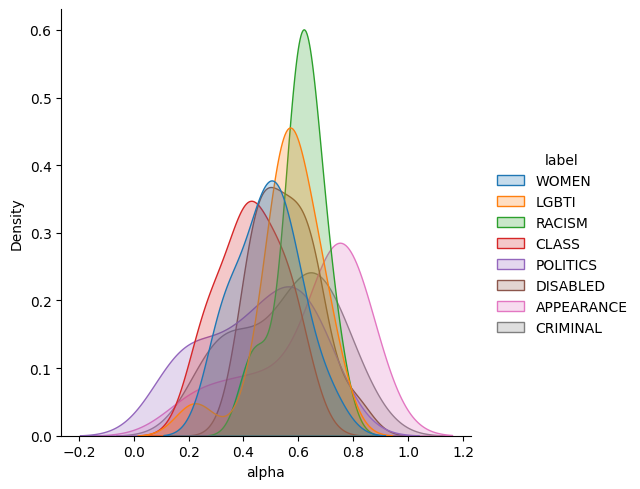

In [141]:
import seaborn as sns
df_alpha = pd.DataFrame(agreements)

# sns distplot


sns.displot(df_alpha, x="alpha", hue="label", kind="kde", fill=True)


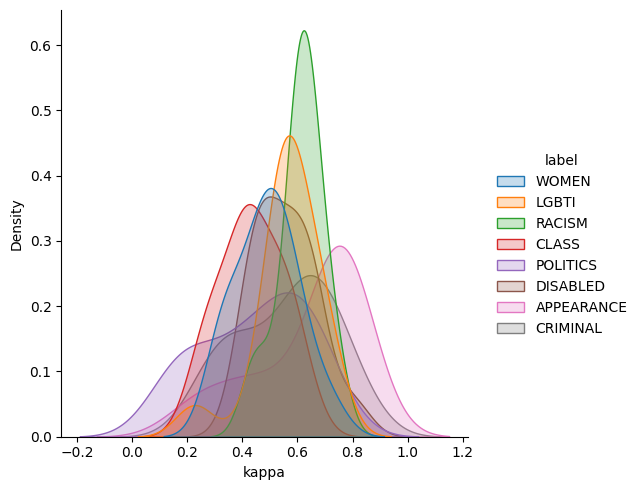

In [142]:
sns.displot(df_alpha, x="kappa", hue="label", kind="kde", fill=True)

In [143]:
# Get min by label

df_alpha.groupby("label")["alpha"].min(), df_alpha.groupby("label")["kappa"].min()

(label
 APPEARANCE    0.200225
 CLASS         0.233449
 CRIMINAL      0.249758
 DISABLED      0.396906
 LGBTI         0.222960
 POLITICS      0.138218
 RACISM        0.419165
 WOMEN         0.310043
 Name: alpha, dtype: float64,
 label
 APPEARANCE    0.213520
 CLASS         0.240255
 CRIMINAL      0.260969
 DISABLED      0.397037
 LGBTI         0.227422
 POLITICS      0.143474
 RACISM        0.429460
 WOMEN         0.313971
 Name: kappa, dtype: float64)

In [144]:
df_alpha.groupby("label")["alpha"].max(), df_alpha.groupby("label")["kappa"].max()

(label
 APPEARANCE    0.807511
 CLASS         0.623589
 CRIMINAL      0.824650
 DISABLED      0.801120
 LGBTI         0.731973
 POLITICS      0.704790
 RACISM        0.748909
 WOMEN         0.714324
 Name: alpha, dtype: float64,
 label
 APPEARANCE    0.807536
 CLASS         0.623713
 CRIMINAL      0.824591
 DISABLED      0.801087
 LGBTI         0.731896
 POLITICS      0.704805
 RACISM        0.749044
 WOMEN         0.714509
 Name: kappa, dtype: float64)

In [145]:
df_chatgpt = df[pred_labels]
df_chatgpt.columns = [x.replace("PRED_", "") for x in df_chatgpt.columns]

df_chatgpt

,WOMEN,LGBTI,RACISM,CLASS,POLITICS,DISABLED,APPEARANCE,CRIMINAL
id,,,,,,,,
339709,0,0,1,0,0,0,0,0
395003,0,0,0,0,1,0,0,0
381327,0,0,0,0,0,0,0,0
371979,0,0,0,0,0,0,0,0
342998,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
355445,0,0,0,0,0,0,0,0
360240,0,0,0,0,0,0,0,0
375158,0,0,0,0,0,0,0,0


In [154]:


chatgpt_agreements = []

for label in labels:
    print(f"Label: {label}")
    label_df = df_chatgpt[label]
    for annotator in annotators:

        annotator_labels = df_annotations.loc[(label, annotator)].loc[df_chatgpt.index]

        cols = annotator_labels.notna() & label_df.notna()

        num_labels = cols.sum()

        print(f"Annotator {annotator:<12}: labels: {cols.sum()}")
        # Cohen's kappa

        annotator_labels = annotator_labels[cols].astype(float).values
        chatgpt_labels = label_df[cols].astype(float).values

        kappa = cohen_kappa_score(annotator_labels, chatgpt_labels)

        chatgpt_agreements.append({
            "annotator": annotator,
            "label": label,
            "kappa": kappa,
            "n": num_labels,
        })



Label: WOMEN
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: LGBTI
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: RACISM
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384


/home/jmperez/projects/rioplatense_hate_speech/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:697: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: CLASS
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: POLITICS
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: DISABLED
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annotator annotator_4 : labels: 62
Label: APPEARANCE
Annotator annotator_2 : labels: 352
Annotator annotator_5 : labels: 329
Annotator annotator_1 : labels: 384
Annotator annotator_6 : labels: 331
Annotator annotator_3 : labels: 120
Annot

In [155]:
pd.DataFrame(chatgpt_agreements)

,annotator,label,kappa,n
0,annotator_2,WOMEN,0.343109,352
1,annotator_5,WOMEN,0.462216,329
2,annotator_1,WOMEN,0.602237,384
3,annotator_6,WOMEN,0.568111,331
4,annotator_3,WOMEN,-0.011236,120
5,annotator_4,WOMEN,-0.026490,62
6,annotator_2,LGBTI,0.506374,352
7,annotator_5,LGBTI,0.416408,329
8,annotator_1,LGBTI,0.625731,384
9,annotator_6,LGBTI,0.214842,331


In [156]:
chatgpt_agreements = pd.DataFrame(chatgpt_agreements)

max = chatgpt_agreements.groupby("label")["kappa"].max()

min = chatgpt_agreements.groupby("label")["kappa"].min()

mean = chatgpt_agreements.groupby("label")["kappa"].mean()

median = chatgpt_agreements.groupby("label")["kappa"].median()

print("Max")
print(max)
print("Min")
print(min)
print("Median")

print(median)


Max
label
APPEARANCE    0.473684
CLASS         0.398128
CRIMINAL      0.495027
DISABLED      1.000000
LGBTI         0.625731
POLITICS      0.367033
RACISM        0.783784
WOMEN         0.602237
Name: kappa, dtype: float64
Min
label
APPEARANCE   -0.026490
CLASS         0.000000
CRIMINAL      0.000000
DISABLED     -0.008122
LGBTI         0.214842
POLITICS     -0.016393
RACISM        0.452991
WOMEN        -0.026490
Name: kappa, dtype: float64
Median
label
APPEARANCE    0.213906
CLASS         0.196229
CRIMINAL      0.372168
DISABLED      0.106138
LGBTI         0.506374
POLITICS      0.284727
RACISM        0.673317
WOMEN         0.402662
Name: kappa, dtype: float64


In [163]:
chatgpt_agreements.groupby(["label"])["kappa"].max()

label
APPEARANCE    0.473684
CLASS         0.398128
CRIMINAL      0.495027
DISABLED      1.000000
LGBTI         0.625731
POLITICS      0.367033
RACISM        0.783784
WOMEN         0.602237
Name: kappa, dtype: float64

In [167]:
pd.DataFrame(annotator_to_agreement["annotator_2"]).groupby("label")["kappa"].median()

label
APPEARANCE    0.731845
CLASS         0.398388
CRIMINAL      0.546166
DISABLED      0.558329
LGBTI         0.529190
POLITICS      0.544939
RACISM        0.627973
WOMEN         0.510051
Name: kappa, dtype: float64